#### **Problem №3: Springy Double Pendulum**

Consider the following system:


<p align="center">
<img src="https://drive.google.com/uc?id=191DRVGUMVNG9qGNzdw62jPk3N_JrcXgJ" alt="drawing" width="50%" style="margin:auto"/>
</p>

Do the following:

* **[15 points]** Derive the dynamics of the system using Euler-Lagrange equations, and write the dynamics in the form: $\mathbf{M}(\mathbf{q})\ddot{\mathbf{q}} + \mathbf{C}(\mathbf{q},\dot{\mathbf{q}})\dot{\mathbf{q}} + \mathbf{g}(\mathbf{q}) = \mathbf{Q}$.

* **[15 points]** Set the external forces to zero: $\mathbf{Q} = \boldsymbol{0}$, and simulate the motion using a 4th-order Runge-Kutta algorithm, such that the system was initially at rest with the cartesian position of the second mass $\mathbf{r} 2 = [1.8, 0]$. Animate the resulting motion, plot the trajectories and the full energy of the system ( recall [practice 4](https://docs.google.com/document/d/17JVy8mS9g2jEDtrdaJnYGX3pBBGFVm5pjCG2oQ3rrS0/edit) )

* **[10 points]** Set the external torque on the first joint as follows: $\mathbf{Q}_1(t) = 10(\sin(t) - \mathbf{q}_1) - 0.2\dot{\mathbf{q}}_1$ and repeat the previous step.

In [1]:
m1 = 0.5  # [kg] - mass in the first joint
m2 = 1.0  # [kg] - mass on the end of spring
l1 = 1.0  # [m] - the length of second link
l2 = 0.8  # [m] - the length of spring at the rest
k = 200  # [N/m] the stifness of the spring
g = 9.81  # [m/s^2] the gravitational acceleration


In [2]:
import sympy as sp

t = sp.symbols('t', real=True)
m1, m2, l1, l2, k, g = sp.symbols('m1 m2 l1 l2 k g')
q = sp.symbols(r'\theta_1 \theta_2 x', cls=sp.Function)
q = [q[i](t) for i in range(3)]
dq = [sp.diff(q[i], t) for i in range(3)]
ddq = [sp.diff(dq[i], t) for i in range(3)]

q, dq, ddq

([\theta_1(t), \theta_2(t), x(t)],
 [Derivative(\theta_1(t), t), Derivative(\theta_2(t), t), Derivative(x(t), t)],
 [Derivative(\theta_1(t), (t, 2)),
  Derivative(\theta_2(t), (t, 2)),
  Derivative(x(t), (t, 2))])

In [3]:
x1 = l1 * sp.sin(q[0])
y1 = -l1 * sp.cos(q[0])
x2 = x1 + (l2 + q[2]) * sp.sin(q[1])
y2 = y1 - (l2 + q[2]) * sp.cos(q[1])

dx1 = sp.diff(x1, t)
dy1 = sp.diff(y1, t)
dx2 = sp.diff(x2, t)
dy2 = sp.diff(y2, t)

In [4]:
# potential energy
P = sp.Matrix([[m1 * g * y1 + m2 * g * y2 + 0.5 * k * q[2]**2]])
# P.simplify()
# P.trigsimp()

# kinetic energy
K = sp.Matrix([[0.5 * m1 * (dx1**2 + dy1**2) + 0.5 * m2 * (dx2**2 + dy2**2)]])
# K.simplify()
# K.trigsimp()

L = K - P
# L = sp.simplify(L)

display(P)
display(K)

Matrix([[-g*l1*m1*cos(\theta_1(t)) + g*m2*(-l1*cos(\theta_1(t)) - (l2 + x(t))*cos(\theta_2(t))) + 0.5*k*x(t)**2]])

Matrix([[0.5*m1*(l1**2*sin(\theta_1(t))**2*Derivative(\theta_1(t), t)**2 + l1**2*cos(\theta_1(t))**2*Derivative(\theta_1(t), t)**2) + 0.5*m2*((l1*sin(\theta_1(t))*Derivative(\theta_1(t), t) + (l2 + x(t))*sin(\theta_2(t))*Derivative(\theta_2(t), t) - cos(\theta_2(t))*Derivative(x(t), t))**2 + (l1*cos(\theta_1(t))*Derivative(\theta_1(t), t) + (l2 + x(t))*cos(\theta_2(t))*Derivative(\theta_2(t), t) + sin(\theta_2(t))*Derivative(x(t), t))**2)]])

In [5]:
equations = L.jacobian(dq).diff(t).T - L.jacobian(q).T
# equations = sp.simplify(equations)
equations = sp.expand(equations)

equations

Matrix([
[                                                                                                                                        g*l1*m1*sin(\theta_1(t)) + g*l1*m2*sin(\theta_1(t)) + 1.0*l1**2*m1*sin(\theta_1(t))**2*Derivative(\theta_1(t), (t, 2)) + 1.0*l1**2*m1*cos(\theta_1(t))**2*Derivative(\theta_1(t), (t, 2)) + 1.0*l1**2*m2*sin(\theta_1(t))**2*Derivative(\theta_1(t), (t, 2)) + 1.0*l1**2*m2*cos(\theta_1(t))**2*Derivative(\theta_1(t), (t, 2)) + 1.0*l1*l2*m2*sin(\theta_1(t))*sin(\theta_2(t))*Derivative(\theta_2(t), (t, 2)) + 1.0*l1*l2*m2*sin(\theta_1(t))*cos(\theta_2(t))*Derivative(\theta_2(t), t)**2 - 1.0*l1*l2*m2*sin(\theta_2(t))*cos(\theta_1(t))*Derivative(\theta_2(t), t)**2 + 1.0*l1*l2*m2*cos(\theta_1(t))*cos(\theta_2(t))*Derivative(\theta_2(t), (t, 2)) + 1.0*l1*m2*x(t)*sin(\theta_1(t))*sin(\theta_2(t))*Derivative(\theta_2(t), (t, 2)) + 1.0*l1*m2*x(t)*sin(\theta_1(t))*cos(\theta_2(t))*Derivative(\theta_2(t), t)**2 - 1.0*l1*m2*x(t)*sin(\theta_2(t))*cos(\theta_1(t))

In [6]:
from itertools import product

# find inertia matrix
M = sp.zeros(3, 3)
for i, j in product(range(3), range(3)):
    M[i, j] = equations[i].coeff(ddq[j])

M

Matrix([
[                                                            1.0*l1**2*m1*sin(\theta_1(t))**2 + 1.0*l1**2*m1*cos(\theta_1(t))**2 + 1.0*l1**2*m2*sin(\theta_1(t))**2 + 1.0*l1**2*m2*cos(\theta_1(t))**2,                   1.0*l1*l2*m2*sin(\theta_1(t))*sin(\theta_2(t)) + 1.0*l1*l2*m2*cos(\theta_1(t))*cos(\theta_2(t)) + 1.0*l1*m2*x(t)*sin(\theta_1(t))*sin(\theta_2(t)) + 1.0*l1*m2*x(t)*cos(\theta_1(t))*cos(\theta_2(t)), -1.0*l1*m2*sin(\theta_1(t))*cos(\theta_2(t)) + 1.0*l1*m2*sin(\theta_2(t))*cos(\theta_1(t))],
[1.0*l1*l2*m2*sin(\theta_1(t))*sin(\theta_2(t)) + 1.0*l1*l2*m2*cos(\theta_1(t))*cos(\theta_2(t)) + 1.0*l1*m2*x(t)*sin(\theta_1(t))*sin(\theta_2(t)) + 1.0*l1*m2*x(t)*cos(\theta_1(t))*cos(\theta_2(t)), 1.0*l2**2*m2*sin(\theta_2(t))**2 + 1.0*l2**2*m2*cos(\theta_2(t))**2 + 2.0*l2*m2*x(t)*sin(\theta_2(t))**2 + 2.0*l2*m2*x(t)*cos(\theta_2(t))**2 + 1.0*m2*x(t)**2*sin(\theta_2(t))**2 + 1.0*m2*x(t)**2*cos(\theta_2(t))**2,                                                                 

In [7]:
# find gravity vector

G = P.jacobian(q).T

G

Matrix([
[g*l1*m1*sin(\theta_1(t)) + g*l1*m2*sin(\theta_1(t))],
[                  g*m2*(l2 + x(t))*sin(\theta_2(t))],
[                -g*m2*cos(\theta_2(t)) + 1.0*k*x(t)]])

In [8]:
# find coriolis vector h(q, dq)

h = equations - M @ sp.Matrix(ddq) - G
h = sp.simplify(h)
h

Matrix([
[                                        l1*m2*(1.0*l2*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), t) + 1.0*x(t)*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), t) + 2.0*cos(\theta_1(t) - \theta_2(t))*Derivative(x(t), t))*Derivative(\theta_2(t), t)],
[m2*(-1.0*l1*l2*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)**2 - 1.0*l1*x(t)*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)**2 + 2.0*l2*Derivative(\theta_2(t), t)*Derivative(x(t), t) + 2.0*x(t)*Derivative(\theta_2(t), t)*Derivative(x(t), t))],
[                                                                                                                        -1.0*m2*(l1*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)**2 + l2*Derivative(\theta_2(t), t)**2 + x(t)*Derivative(\theta_2(t), t)**2)]])

In [9]:
# substitute actual parameters of system

params = dict(
    m1=0.5,  # [kg] - mass in the first joint
    m2=1.0,  # [kg] - mass on the end of spring
    l1=1.0,  # [m] - the length of second link
    l2=0.8,  # [m] - the length of spring at the rest
    k=200,  # [N/m] the stifness of the spring
    g=9.81,  # [m/s^2] the gravitational acceleration
)

M = M.subs(params)
G = G.subs(params)
h = h.subs(params)

M

Matrix([
[                                                                                                                      1.5*sin(\theta_1(t))**2 + 1.5*cos(\theta_1(t))**2,               1.0*x(t)*sin(\theta_1(t))*sin(\theta_2(t)) + 1.0*x(t)*cos(\theta_1(t))*cos(\theta_2(t)) + 0.8*sin(\theta_1(t))*sin(\theta_2(t)) + 0.8*cos(\theta_1(t))*cos(\theta_2(t)), -1.0*sin(\theta_1(t))*cos(\theta_2(t)) + 1.0*sin(\theta_2(t))*cos(\theta_1(t))],
[1.0*x(t)*sin(\theta_1(t))*sin(\theta_2(t)) + 1.0*x(t)*cos(\theta_1(t))*cos(\theta_2(t)) + 0.8*sin(\theta_1(t))*sin(\theta_2(t)) + 0.8*cos(\theta_1(t))*cos(\theta_2(t)), 1.0*x(t)**2*sin(\theta_2(t))**2 + 1.0*x(t)**2*cos(\theta_2(t))**2 + 1.6*x(t)*sin(\theta_2(t))**2 + 1.6*x(t)*cos(\theta_2(t))**2 + 0.64*sin(\theta_2(t))**2 + 0.64*cos(\theta_2(t))**2,                                                                              0],
[                                                                                         -1.0*sin(\theta_1(t))*cos(\theta_

In [10]:
# numerical functions M(q), h(q, dq), G(q)
nums = dict(
    M=sp.lambdify(q, M),
    h=sp.lambdify([q, dq], h),
    G=sp.lambdify(q, G),
    P=sp.lambdify(q, P.subs(params)),
    K=sp.lambdify([q, dq], K.subs(params)),
)

In [38]:
from scipy.integrate import odeint
import numpy as np

# dynamics of the system


def f(x, t):
    q, dq = x[:3], x[3:]

    M = nums['M'](*q)
    h = nums['h'](q, dq)
    G = nums['G'](*q)

    ddq = np.linalg.inv(M) @ (-h - G)
    # use .T[0] to flatten array

    return np.array([*dq, *ddq.T[0]])


# initial state
x0 = np.array([np.pi / 2,  np.pi / 2, 0, 0, 0, 0])

# time span
t = np.linspace(0, 10, 10000)

# solve ODE

x = odeint(f, x0, t)


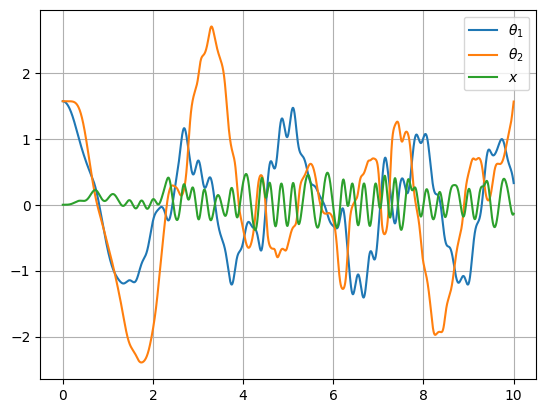

In [39]:
import matplotlib.pyplot as plt

plt.plot(t, x[:, 0], label=r'$\theta_1$')
plt.plot(t, x[:, 1], label=r'$\theta_2$')
plt.plot(t, x[:, 2], label=r'$x$')
plt.grid()
plt.legend()
plt.show()

In [40]:
# dump data to json
import json

output = np.hstack([t.reshape(-1, 1), x[:, :3]])

with open('vis-data/problem3_zero.json', 'w') as f:
    json.dump(output.tolist(), f)

In [41]:
# positions of joints
theta1 = x[:, 0]
theta2 = x[:, 1]
disp = x[:, 2]

p1 = np.array([params['l1'] * np.sin(theta1), -params['l1'] * np.cos(theta1)]).T
p2 = p1 + np.array([(params['l2'] + disp) * np.sin(theta2), -(params['l2'] + disp) * np.cos(theta2)]).T

p1.shape, p2.shape

((10000, 2), (10000, 2))

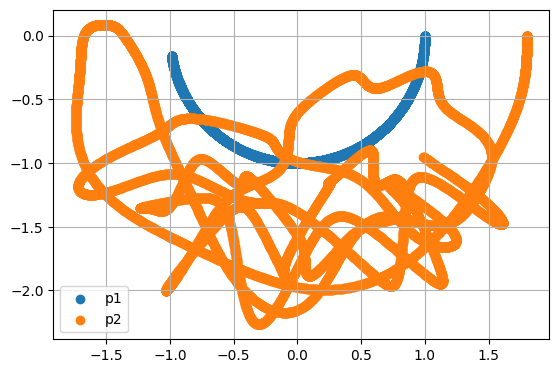

In [42]:
# display p1, p2

ax = plt.gca()

ax.scatter(p1[:, 0], p1[:, 1], label='p1')
ax.scatter(p2[:, 0], p2[:, 1], label='p2')

ax.set_aspect('equal')
ax.grid()

plt.legend()

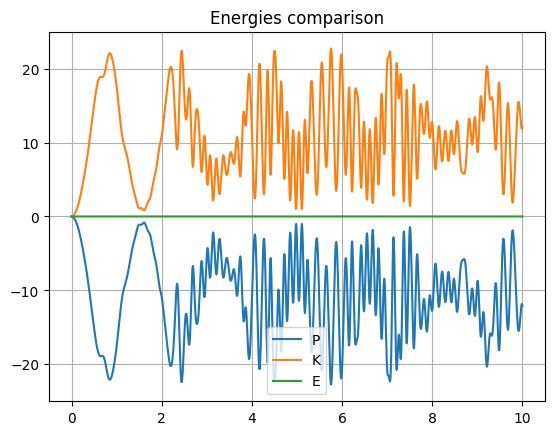

In [43]:
# plot energies

energies=dict(
    potential=nums['P'](*x[:, :3].T)[0][0],
    kinetic=nums['K'](x[:, :3].T, x[:, 3:].T)[0][0],
)

plt.plot(t, energies['potential'], label='P')
plt.plot(t, energies['kinetic'], label='K')
plt.plot(t, energies['potential'] + energies['kinetic'], label='E')
plt.legend()
plt.title('Energies comparison')
plt.grid()


## Set external force for first joint

In [44]:
from scipy.integrate import odeint
import numpy as np

# dynamics of the system


def f(x, t):
    q, dq = x[:3], x[3:]

    M = nums['M'](*q)
    h = nums['h'](q, dq)
    G = nums['G'](*q)

    forces = np.array([
        [10 * (np.sin(t) - q[0]) - 0.2 * dq[0]],
        [0],
        [0],
    ])

    ddq = np.linalg.inv(M) @ (-h - G + forces)

    return np.array([*dq, *ddq.T[0]])

# initial state
x0 = np.array([np.pi / 2, np.pi / 2, 0, 0, 0, 0])

# time span
t = np.linspace(0, 100, 30000)

# solve ODE

x = odeint(f, x0, t)


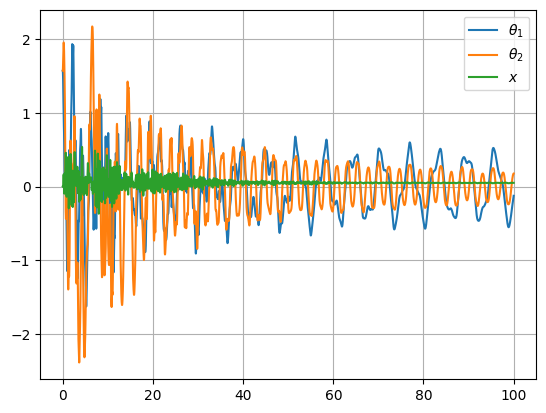

In [45]:
import matplotlib.pyplot as plt

plt.plot(t, x[:, 0], label=r'$\theta_1$')
plt.plot(t, x[:, 1], label=r'$\theta_2$')
plt.plot(t, x[:, 2], label=r'$x$')
plt.legend()
plt.grid()
plt.show()

In [46]:
# dump data to json
import json
# visuaize: https://lvjonok.github.io/visualizer/
output = np.hstack([t.reshape(-1, 1), x[:, :3]])

with open('vis-data/problem3_external.json', 'w') as f:
    json.dump(output.tolist(), f)

In [47]:
# positions of joints
theta1 = x[:, 0]
theta2 = x[:, 1]
disp = x[:, 2]

p1 = np.array([params['l1'] * np.sin(theta1), -params['l1'] * np.cos(theta1)]).T
p2 = p1 + np.array([(params['l2'] + disp) * np.sin(theta2), -(params['l2'] + disp) * np.cos(theta2)]).T

p1.shape, p2.shape

((30000, 2), (30000, 2))

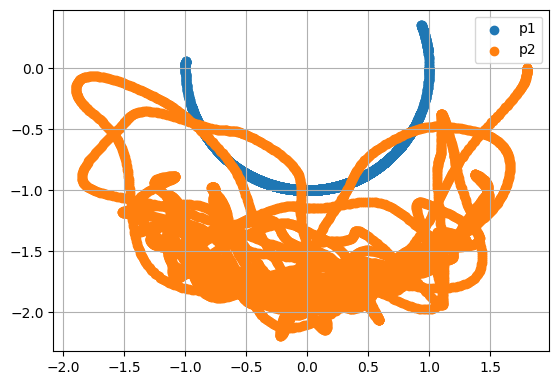

In [48]:
# display p1, p2

ax = plt.gca()

ax.scatter(p1[:, 0], p1[:, 1], label='p1')
ax.scatter(p2[:, 0], p2[:, 1], label='p2')

ax.set_aspect('equal')
plt.grid()

plt.legend()

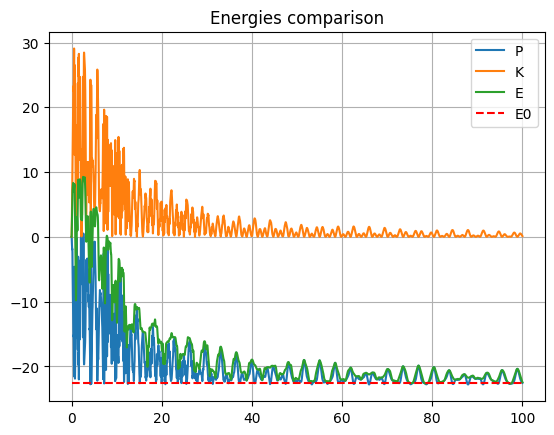

In [49]:
# plot energies

energies=dict(
    potential=nums['P'](*x[:, :3].T)[0][0],
    kinetic=nums['K'](x[:, :3].T, x[:, 3:].T)[0][0],
)

plt.plot(t, energies['potential'], label='P')
plt.plot(t, energies['kinetic'], label='K')
plt.plot(t, energies['potential'] + energies['kinetic'], label='E')

# plot energy of zero state for comparison
plt.hlines(nums['P'](0, 0, 0) + nums['K']([0, 0, 0], [0, 0, 0]), t[0], t[-1], linestyle='--', label='E0', color='red')

plt.grid()
plt.title('Energies comparison')
plt.legend()
